# Importing libraries

In [28]:
import os, shutil
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalAveragePooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image, ImageEnhance
import cv2
import math
import sklearn.metrics as metrics


from keras.utils import to_categorical

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Training, Testing and Validation Data

In [9]:
base_dir = '/content/drive/MyDrive/Colab Notebooks/Datasets/Image Dataset'
train_dir = os.path.join(base_dir, 'Train/')
test_dir = os.path.join(base_dir, 'Test/')
valid_dir = os.path.join(base_dir, 'Validation/')

# Defining Generators for loading the Data

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=10,
                                  horizontal_flip=True,
                                  )
test_datagen = ImageDataGenerator(rescale=1./255)

target_size = (200, 200)
batch_size = 20

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size = target_size,
                                                   batch_size = batch_size,
                                                   class_mode ='binary')
test_generator = test_datagen.flow_from_directory(test_dir,
                                                 target_size = target_size,
                                                 batch_size = batch_size,
                                                 class_mode ='binary')

validation_generator = test_datagen.flow_from_directory(valid_dir,
                                                       target_size = target_size,
                                                       batch_size = batch_size,
                                                       class_mode = 'binary')


Found 4000 images belonging to 2 classes.
Found 249 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


# Class Labels

In [11]:
classes = []
for directory in os.listdir(train_dir):
    classes.append(directory.split('.')[-1])
for class_ in classes:
    print(class_)

Normal_aug
Stone_aug


## Batch Size

In [12]:
for data_batch, labels_batch in train_generator:
    print(data_batch.shape)
    print(labels_batch.shape)
    break

(20, 200, 200, 3)
(20,)


In [13]:
print(len(train_generator))
print(len(test_generator))
print(len(validation_generator))

200
13
20


In [15]:
input_shape = (200, 200, 3)

# Model Architecture

In [16]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape = input_shape))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 128)      

In [17]:
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [18]:
history = model.fit_generator(train_generator,
                            steps_per_epoch=200, 
                            epochs=20,
                            validation_data=validation_generator,
                            validation_steps=20) 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
200/200 [==============================] - 1700s 8s/step - loss: 0.6524 - acc: 0.5902 - val_loss: 0.5643 - val_acc: 0.7325
Epoch 2/20
200/200 [==============================] - 68s 337ms/step - loss: 0.5695 - acc: 0.6890 - val_loss: 0.6353 - val_acc: 0.7050
Epoch 3/20
200/200 [==============================] - 67s 337ms/step - loss: 0.5368 - acc: 0.7099 - val_loss: 0.4950 - val_acc: 0.7550
Epoch 4/20
200/200 [==============================] - 67s 337ms/step - loss: 0.5060 - acc: 0.7188 - val_loss: 0.4474 - val_acc: 0.7675
Epoch 5/20
200/200 [==============================] - 68s 338ms/step - loss: 0.4560 - acc: 0.7628 - val_loss: 0.4202 - val_acc: 0.7750
Epoch 6/20
200/200 [==============================] - 68s 338ms/step - loss: 0.4347 - acc: 0.7745 - val_loss: 0.3614 - val_acc: 0.7875
Epoch 7/20
200/200 [==============================] - 68s 337ms/step - loss: 0.4004 - acc: 0.8016 - val_loss: 0.3362 - val_acc: 0.8275
Epoch 8/20
200/200 [==============================] - 67

## Save the trained model

In [19]:
model.save('/content/drive/MyDrive/Colab Notebooks/Datasets/Image Dataset/model.h5')

# Looking at the Training Process

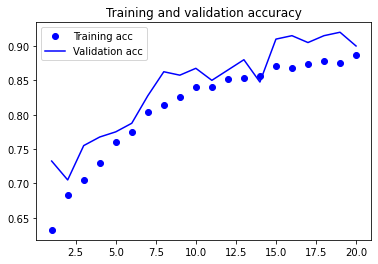

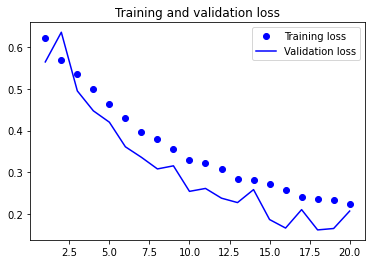

In [20]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Model Evaluation

In [21]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=20)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


In [22]:
print("Test Accuracy : ",test_acc,'or', round(test_acc*100, 2),'%')
print("Test Loss : ",test_loss,'or', round(test_loss*100, 2),'%')

Test Accuracy :  0.9076305031776428 or 90.76 %
Test Loss :  0.25535139441490173 or 25.54 %


In [34]:
test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
    test_dir,
     target_size=target_size,
    batch_size=32,
    shuffle=False)
test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

predictions = model.predict_generator(test_data_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

Found 249 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [35]:
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())   

In [36]:
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report) 

              precision    recall  f1-score   support

      Normal       0.81      1.00      0.90       202
       Stone       0.00      0.00      0.00        47

    accuracy                           0.81       249
   macro avg       0.41      0.50      0.45       249
weighted avg       0.66      0.81      0.73       249



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Testing Modeling Prediction by Random Image

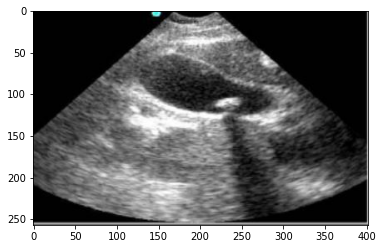

In [ ]:
from PIL import Image
img = Image.open('/content/drive/MyDrive/Colab Notebooks/Datasets/Image Dataset/Test Images/image2.JPG')
#img = Image.open('/content/drive/MyDrive/Colab Notebooks/Datasets/Image Dataset/Train/Normal_aug/augmented_image_1.jpg')
plt.imshow(img)

[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [  1   1   1]
  [  5   5   5]
  [110 110 110]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [  1   1   1]
  [  5   5   5]
  [110 110 110]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [  1   1   1]
  [  5   5   5]
  [110 110 110]]

 ...

 [[ 71  71  71]
  [ 71  71  71]
  [ 71  71  71]
  ...
  [ 70  70  70]
  [ 74  74  74]
  [150 150 150]]

 [[158 158 158]
  [158 158 158]
  [158 158 158]
  ...
  [158 158 158]
  [161 161 161]
  [176 176 176]]

 [[116 116 116]
  [116 116 116]
  [116 116 116]
  ...
  [116 116 116]
  [116 116 116]
  [116 116 116]]]


(200, 200, 3)

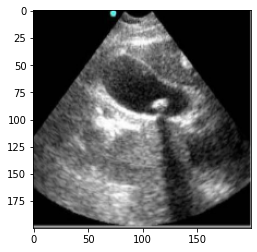

In [ ]:
import cv2

img_array = np.asarray(img)
resized = cv2.resize(img_array, (200, 200 ))
plt.imshow(resized)
print(resized)
resized.shape

In [ ]:
resized = resized / 255
resized.reshape(200, 200, 3)
image=[]
image.append(resized)
new=np.asarray(image)
new.ndim

4

In [ ]:
prediction = model.predict_classes(new)
print("predicted result:", str(prediction))

predicted result: [[1]]


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
import tensorflow as tf
from tensorflow import keras

new0model=tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Datasets/Image Dataset/model.h5')


In [ ]:
prediction = new0model.predict_classes(new)
print("predicted result:", str(prediction))

predicted result: [[1]]


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
def image_processing(image_path):
    #     path = r'C:\Users\GM\Desktop\Prediction Images\AUG_0_1.jpeg'
    path = image_path
    print("path",path)


    image = Image.open(path)

    # summarize some details about the image

    print(image.format)
    print(image.mode)
    print(image.size)
    # show the image
    # image.show()
    # plt.imshow(image)
    # Image Enhancer
   # fig = plt.figure(figsize=(8, 8))
    # image brightness enhancer
    enhancer = ImageEnhance.Brightness(image)
    factor = 1  # gives original image
    im_output = enhancer.enhance(factor)
    factor = 0.5  # darkens the image
    im_output = enhancer.enhance(factor)
    factor = 1.5  # brightens the image
    im_output = enhancer.enhance(factor)

    # image segmentation
    img = cv2.imread(path)
    print("test5")
    dim = (224, 224)
    img = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)

    print("Image Size: ", img.shape)

    # global thresholding
    ret1, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

    # Otsu's thresholding

   # ret2, th2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Otsu's thresholding after Gaussian filtering
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(img, (5, 5), 0)
    ret3, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Feature Extration
    # fig = plt.figure(figsize=(8, 8))
    # fig.add_subplot(1, 3, 1)
    # plt.imshow(th2)

    # fig.add_subplot(1, 3, 2)
    # plt.imshow(th2)

    # fig.add_subplot(1, 3, 3)
    # plt.imshow(blur)

    # Edge Detection
    edges = cv2.Canny(img, 50, 100)

    # Calculating Area
    # this method will grab the contours
    def grab_contours(cnts):

        # OpenCV v2.4, v4-official
        if len(cnts) == 2:
            return cnts[0]
        # OpenCV v3
        elif len(cnts) == 3:
            return cnts[1]

    cnts = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = grab_contours(cnts)

    contours = cnts

    # Approximate contours to polygons + get bounding rects and circles
    contours_poly = [None] * len(contours)
    centers = [None] * len(contours)
    radius = [None] * len(contours)
    for i, c in enumerate(contours):
        contours_poly[i] = cv2.approxPolyDP(c, 3, True)
        centers[i], radius[i] = cv2.minEnclosingCircle(contours_poly[i])

    try:

        max_cnt = None
        max_len = 0

        c = None
        center = None
        rad = None

        for cc, ccenter, rrad in zip(cnts, centers, radius):
            if len(cc) > max_len:
                c = cc
                center = ccenter
                rad = rrad
                max_len = len(cc)

        #     print(cv2.contourArea(c))
        area = cv2.contourArea(c)
        cv2.drawContours(image=img, contours=[c], contourIdx=0, color=(255, 0, 0), thickness=1, maxLevel=0)
        cv2.circle(img, (int(center[0]), int(center[1])), int(rad), (255, 0, 0), 2)

    #     plt.imshow(img)

    except:
        print("Not Melonoma")

    # CALCULATING Perimetre
    perimeter = cv2.arcLength(c, True)
    # calculating center coordinates
    center_coordinates = (int(center[0]), int(center[1]))
    radius = 2
    color = (255, 255, 255)
    thickness = 1

    img = cv2.circle(img, center_coordinates, radius, color, thickness)

    # calculating GD and SD
    count = 1
    distances = []

    for x1, y1 in zip(edges.nonzero()[0], edges.nonzero()[1]):
        x2 = center_coordinates[0]
        y2 = center_coordinates[1]

        if x2 == x1:
            continue;

        slope = round((y2 - y1) / (x2 - x1), 5)

        lengths = []

        for xx1, yy1 in zip(edges.nonzero()[0], edges.nonzero()[1]):
            if (x2 == xx1):
                continue

            m = round((y2 - yy1) / (x2 - xx1), 5);

            if slope == m:
                lengths.append(((xx1, yy1)))
                img = cv2.line(img, (x1, y1), (x2, y2), (255, 255, 0), thickness=1)

        maxDist = 0

        for i in range(len(lengths)):
            p1 = lengths[i]
            for j in range(i + 1, len(lengths)):
                p2 = lengths[j]

                x1 = p1[0]
                y1 = p1[1]
                x2 = p2[0]
                y2 = p2[1]

                dist = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
                if dist > maxDist:
                    maxDist = dist

        distances.append(maxDist);
        print("Calculating distances..." + str(count), end="\r")
        count += 1

    distances = np.array(distances)
    distances = distances[distances > (max(distances) / 1.5)]

    GD = max(distances)
    SD = min(distances)

    # Calculating A (0-2) for ABCD Formula
    A1 = area / SD
    A2 = area / GD
    A = (A1 + A2)
    # Calculating B (0-8)
    B = perimeter / GD
    ### Calculating C (1-6)
    C = (perimeter * ((1 / SD) - (1 / GD)))
    ### Calculating D (1-5)

    # converting to mm
    D = (GD - SD) / 10
    # classification

    TDS = (A * 1.3) + (B * 0.1) + (C * 0.5) + (D * 0.5)

    print("TDS: ", TDS)

    #         if TDS < 4.75 :
    #             print("Benign melanocytic lesion")
    #         elif TDS > 4.8 and TDS < 5.45:
    #             print("Suspicious lesion; close follow-up or excision recommended")
    #         else:
    #             print("Lesion highly suggestive of melanoma")
    return TDS

In [ ]:
image_processing('/content/drive/MyDrive/Colab Notebooks/Datasets/Image Dataset/Test Images/image1.jpg')

path /content/drive/MyDrive/Colab Notebooks/Datasets/Image Dataset/Test Images/image1.jpg
JPEG
RGB
(243, 346)
test5
Image Size:  (224, 224, 3)
TDS:  7.461292113261411


7.461292113261411